In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
!pip install tensorflow==2.0.0b1
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.0.0-beta1


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(
    (
      tf.cast(series, tf.float32)
    )
  )
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domuscpn-event - filtered3.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

0.48008677


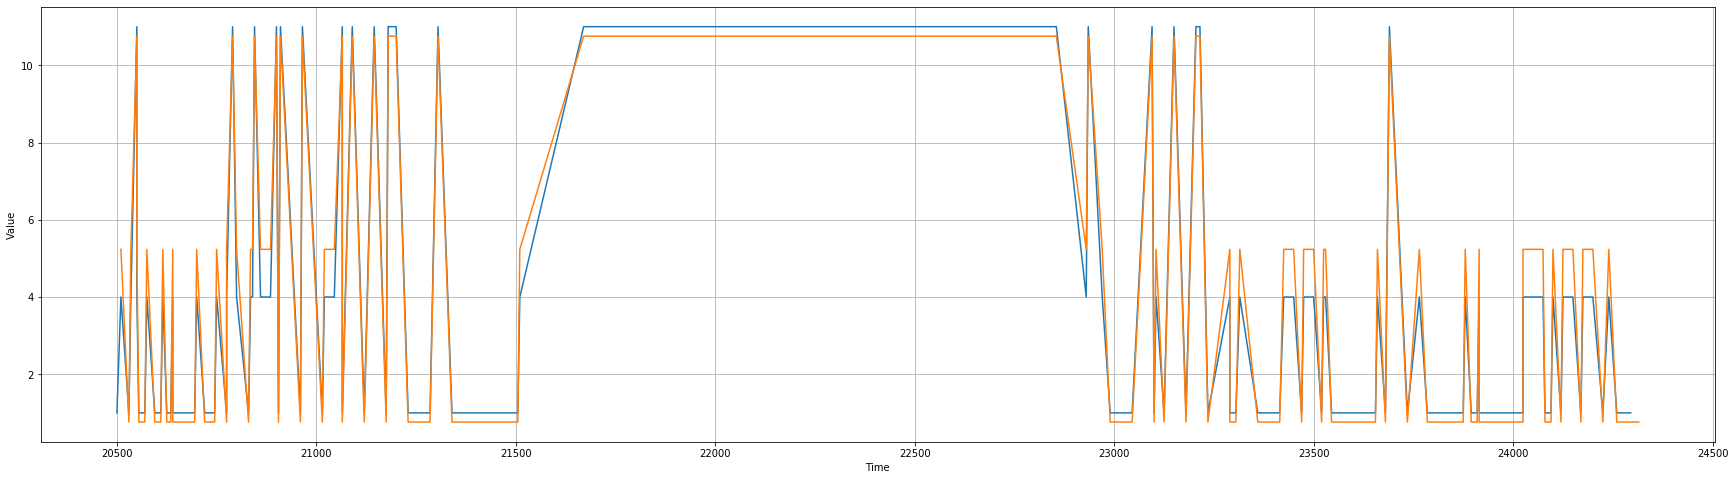

In [ ]:
forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-20)
  prediction = prediction + 6
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domuscpn-event - filtered4.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

1.9030993


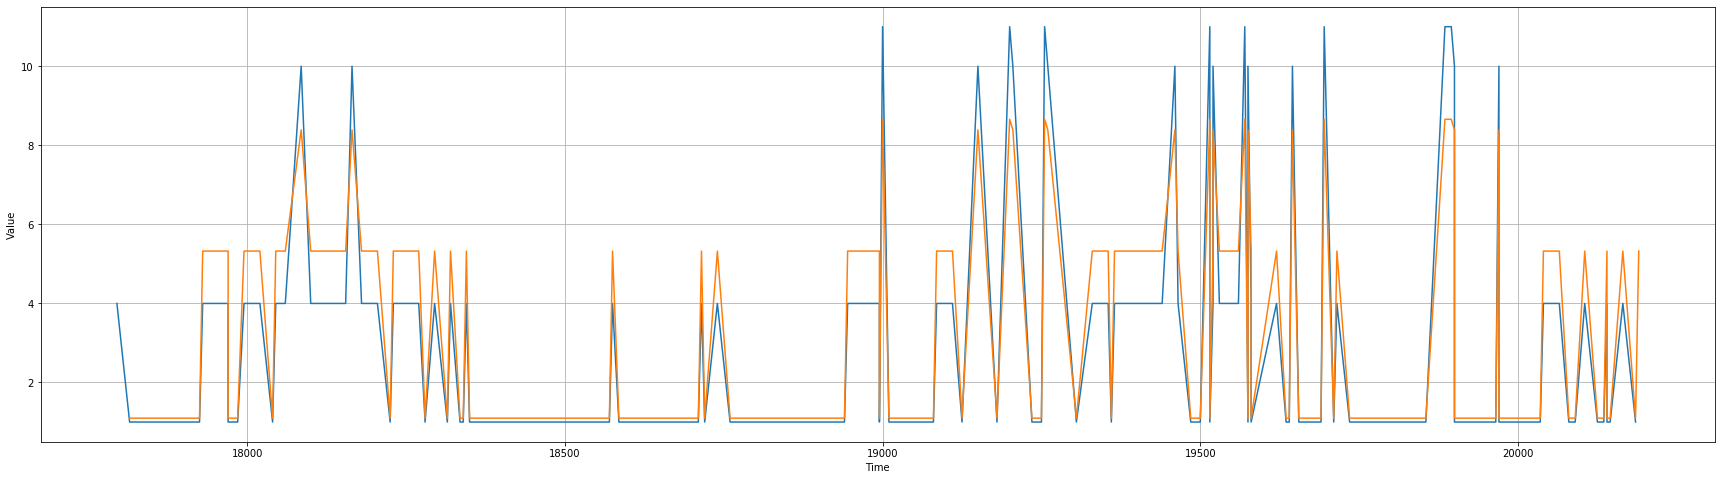

In [ ]:
forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-9)
  prediction = prediction - 2.7
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domuscpn-event - filtered5.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

1.8952967


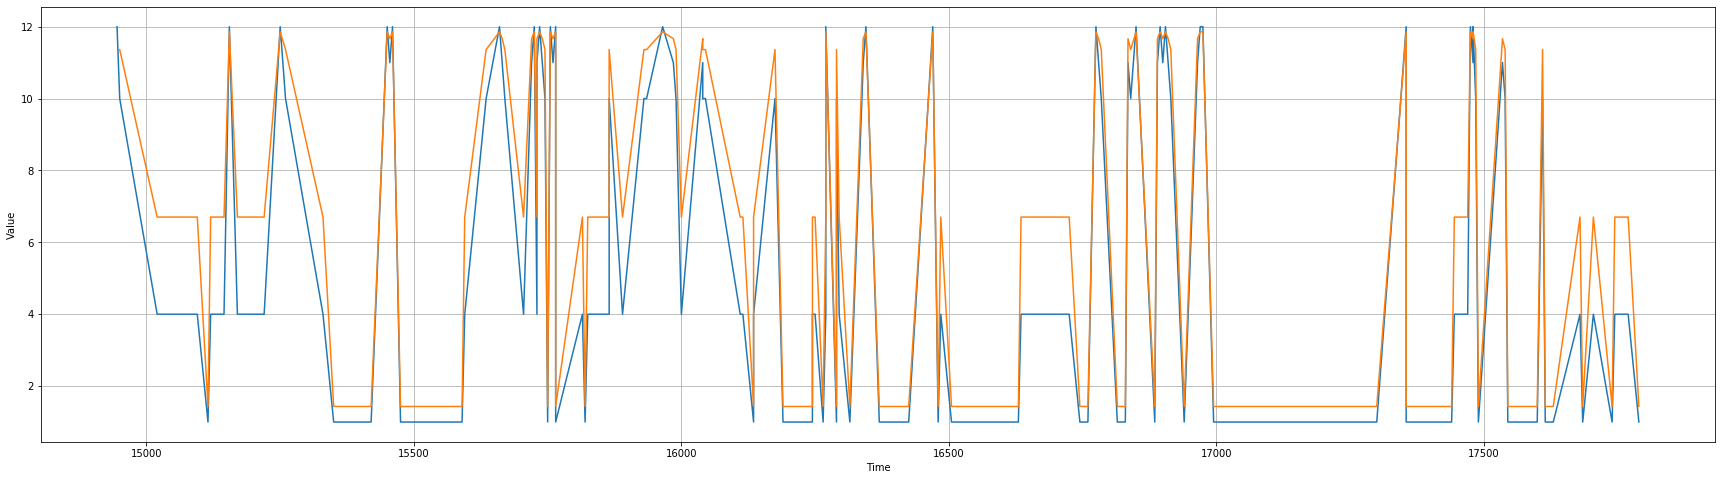

In [ ]:
forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-20)
  prediction = prediction + 6
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domuscpn-event - filtered6.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

2.6350694


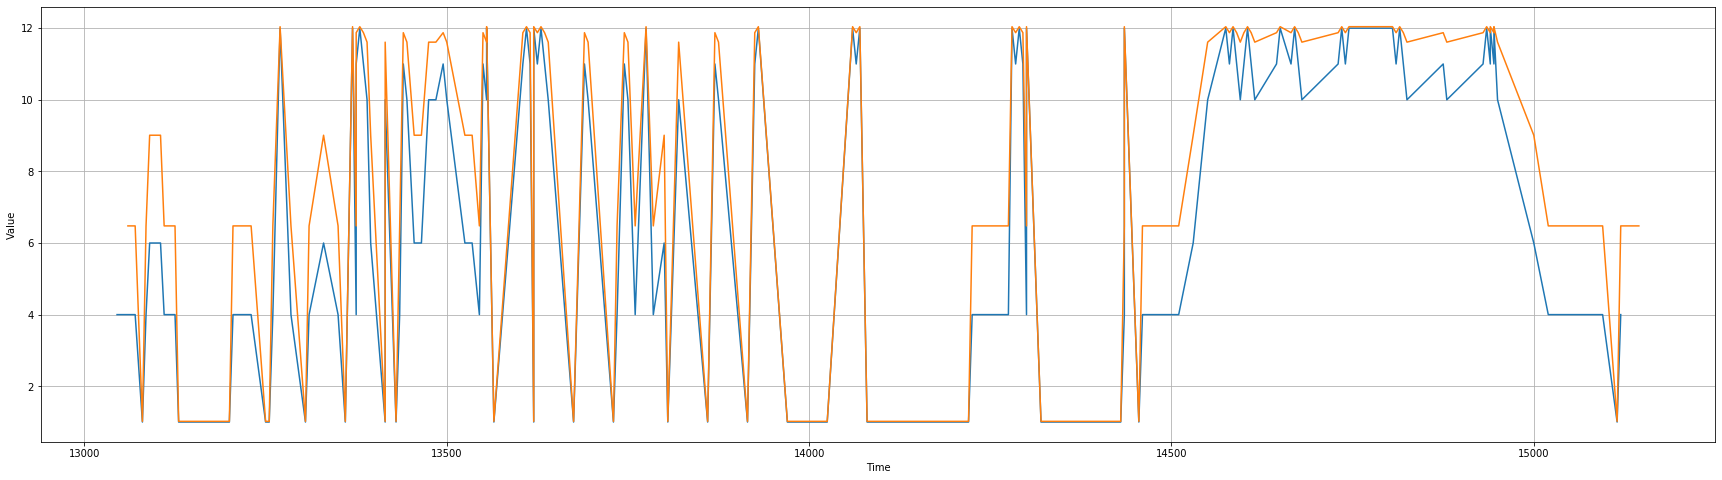

In [ ]:
forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(11)
  prediction = prediction - 19.5
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domuscpn-event - filtered7.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

2.3300822


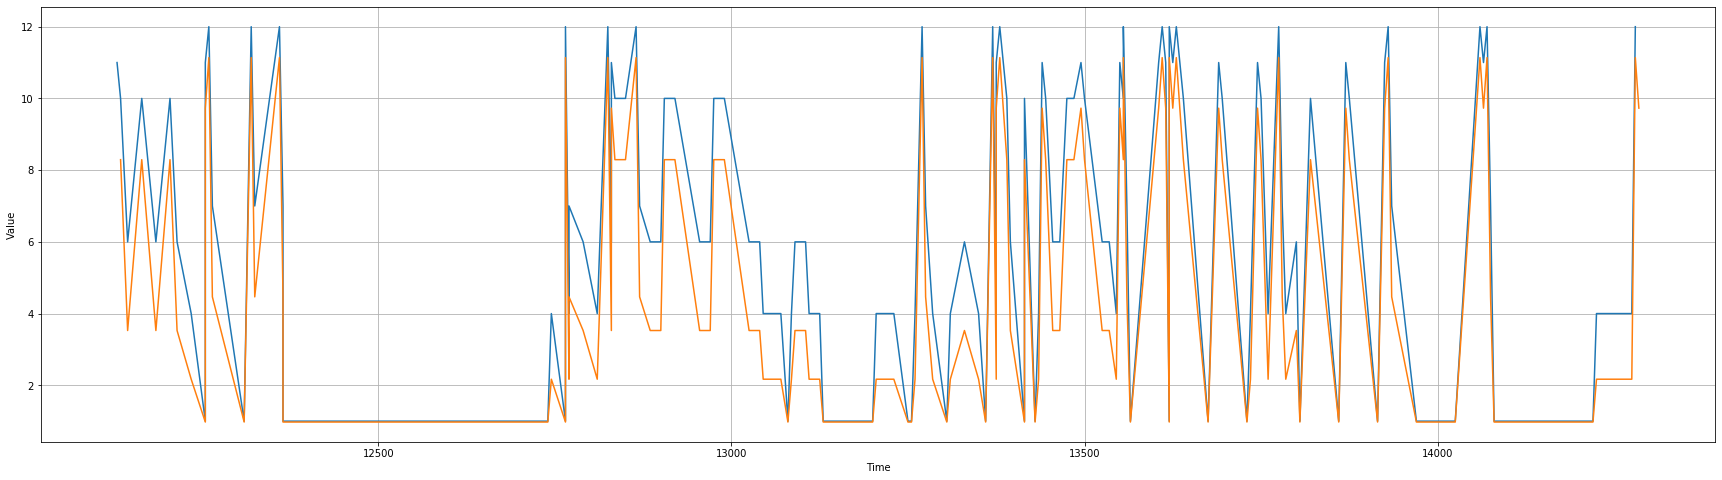

In [ ]:
forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-35)
  prediction = prediction + 28
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domuscpn-event - filtered8.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


0.4468755


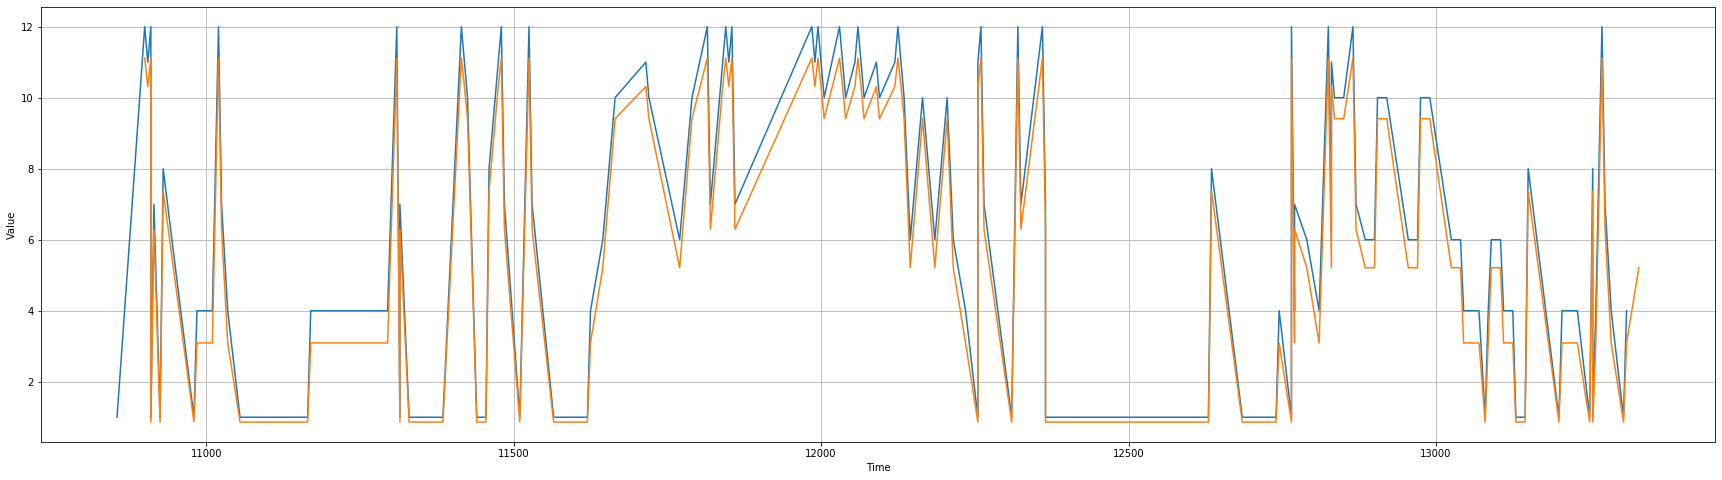

In [ ]:
forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-20)
  prediction = prediction - 9
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domuscpn-event - filtered9.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

39.64245


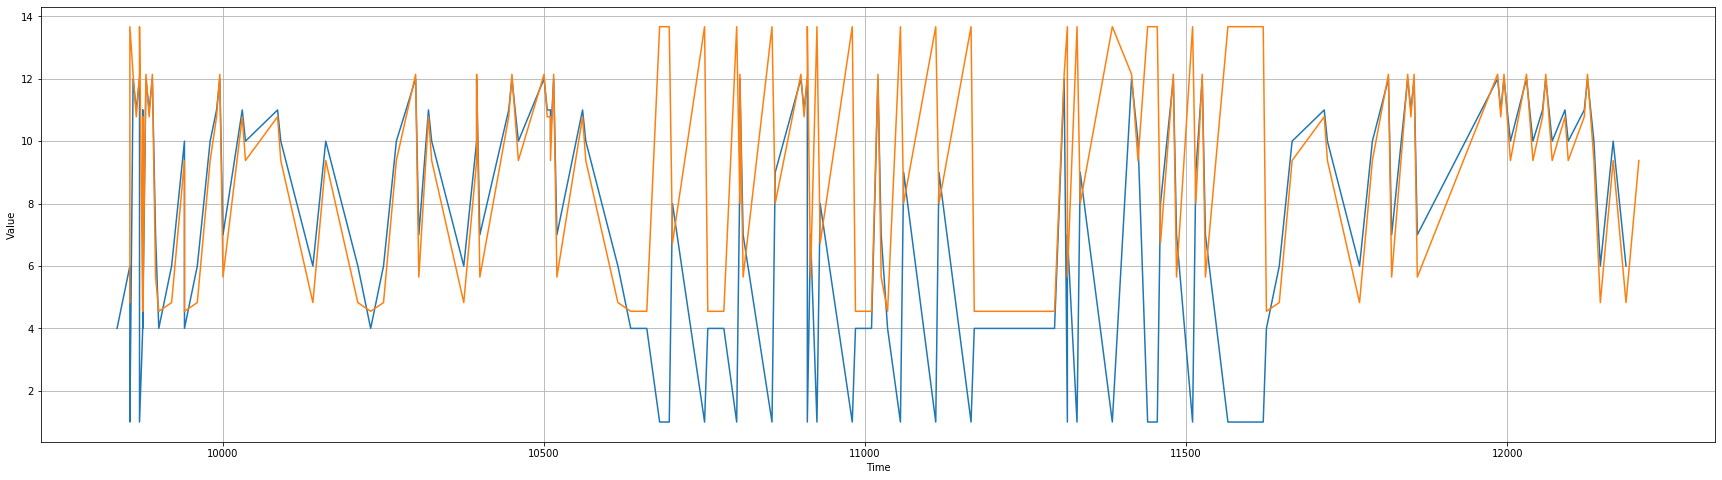

In [ ]:
forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-35)
  prediction = prediction - 20
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domuscpn-event - filtered10.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

9.343446


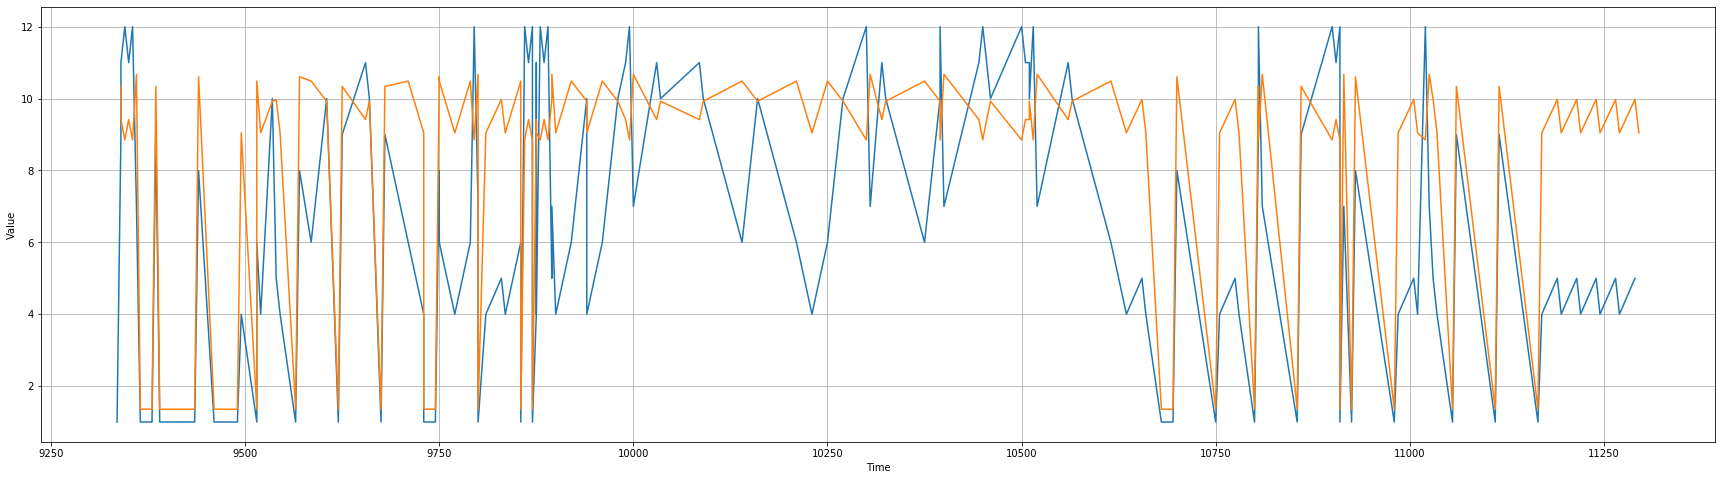

In [ ]:
forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(13)
  prediction = prediction - 3
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

1.609825


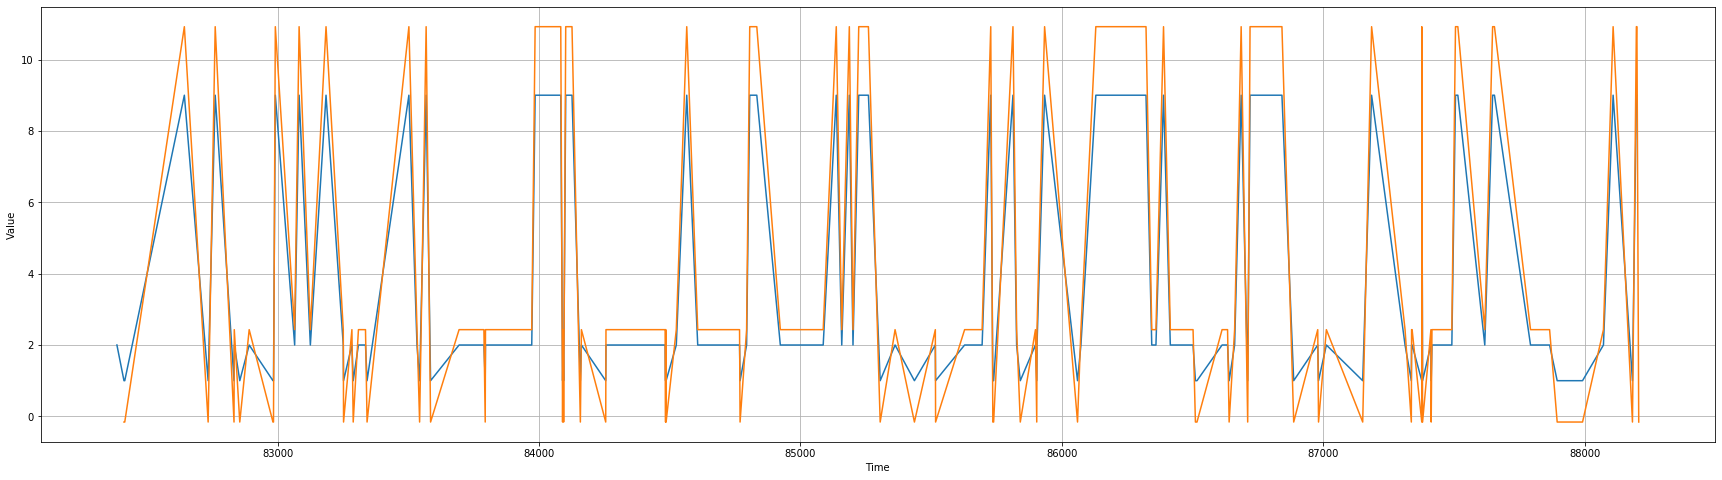

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domusreal-event-ordered - filtered3.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-15)
  prediction = prediction + 6
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

1.5631472


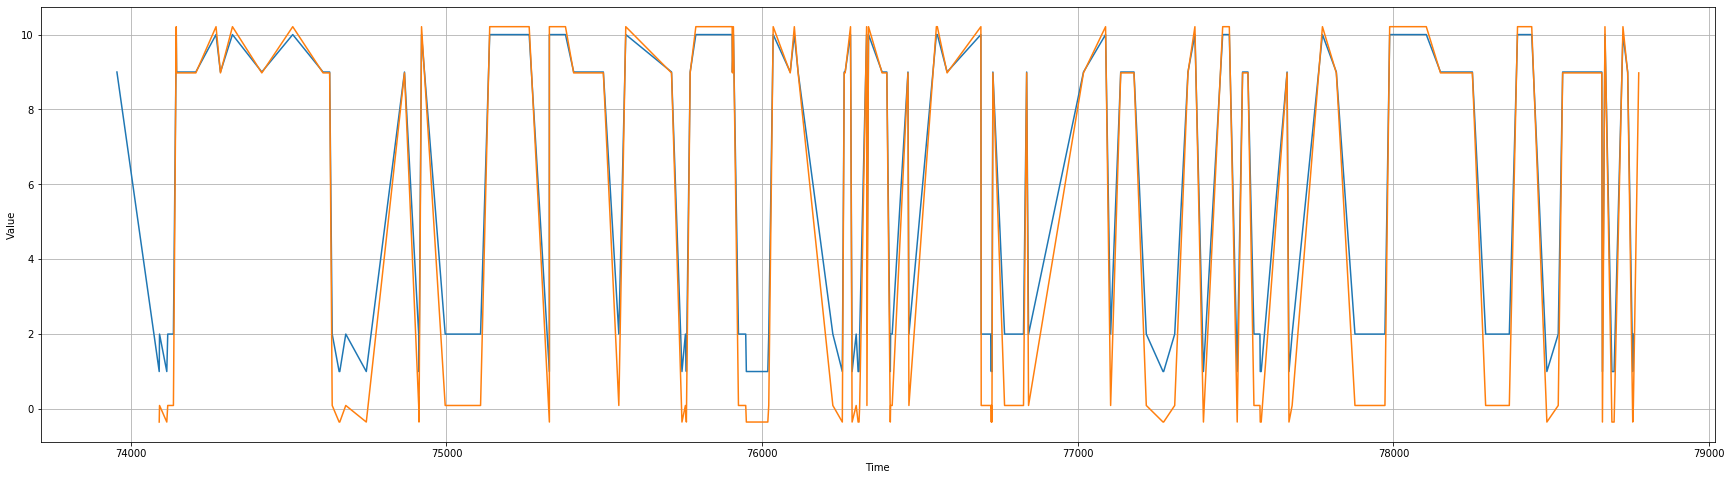

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domusreal-event-ordered - filtered4.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-15)
  prediction = prediction - 19
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

23.984425


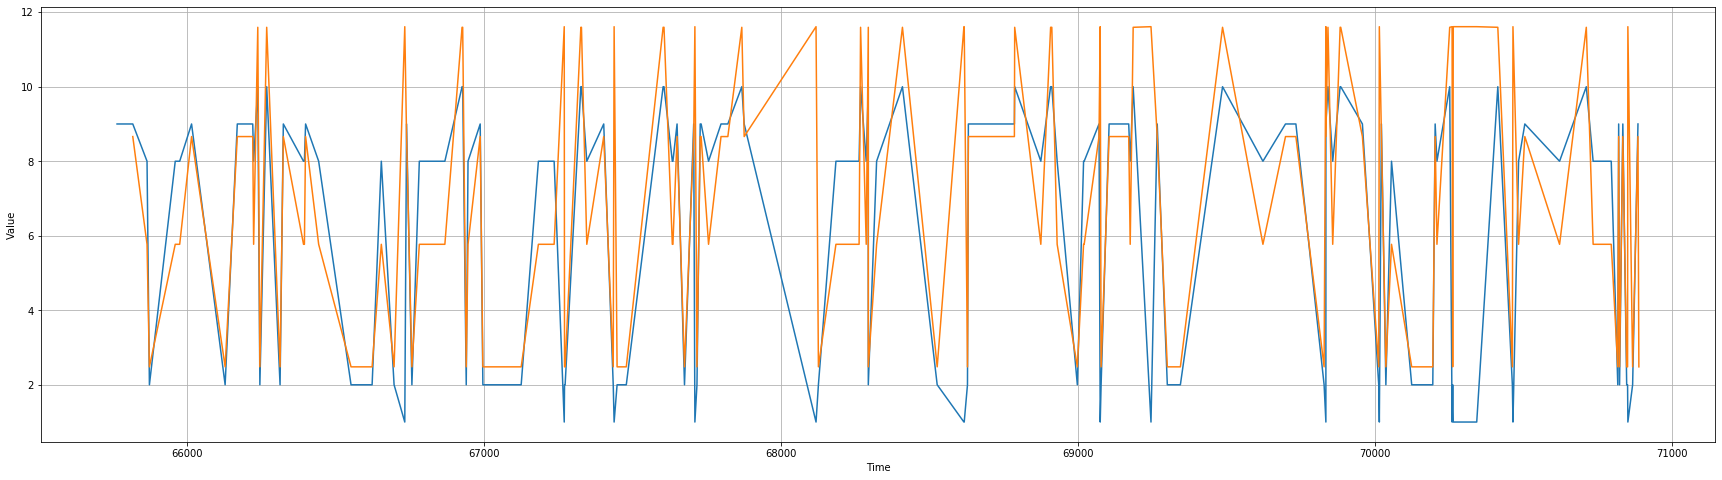

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domusreal-event-ordered - filtered5.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-35)
  prediction = prediction + 70 - 7.5
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

43.73364


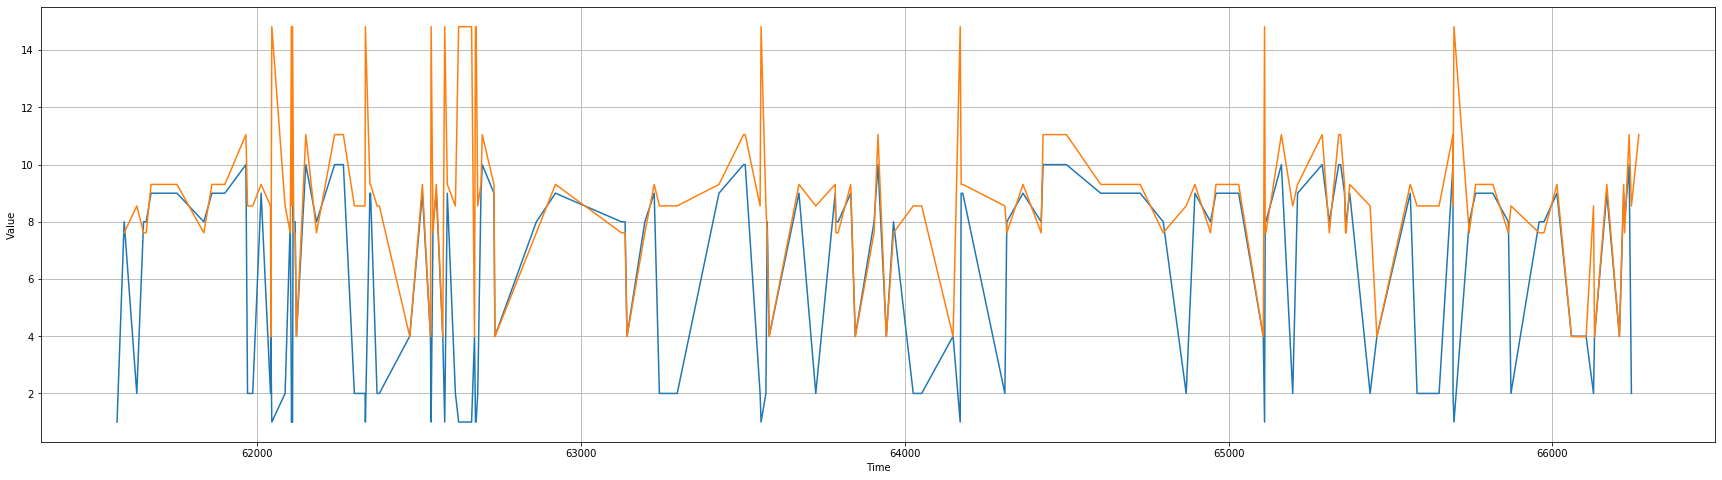

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domusreal-event-ordered - filtered6.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-25)
  prediction = prediction + 22
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

2.1523092


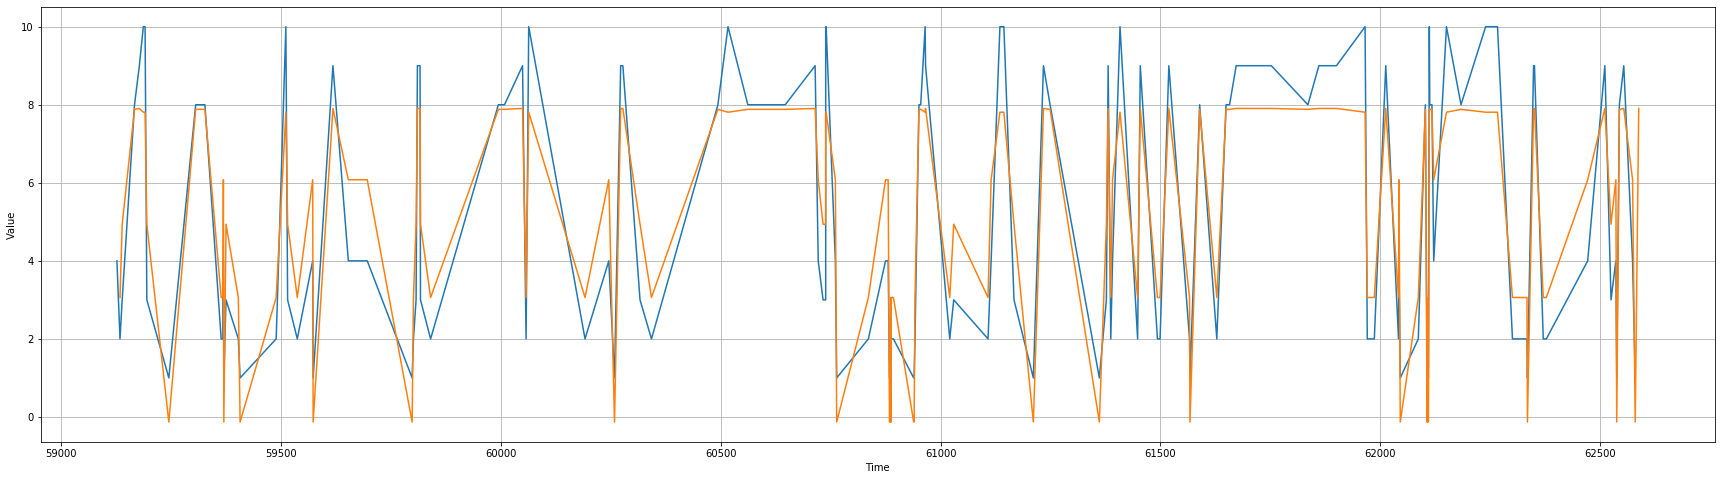

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domusreal-event-ordered - filtered7.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(10)
  prediction = prediction + 11.5
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

11.976184


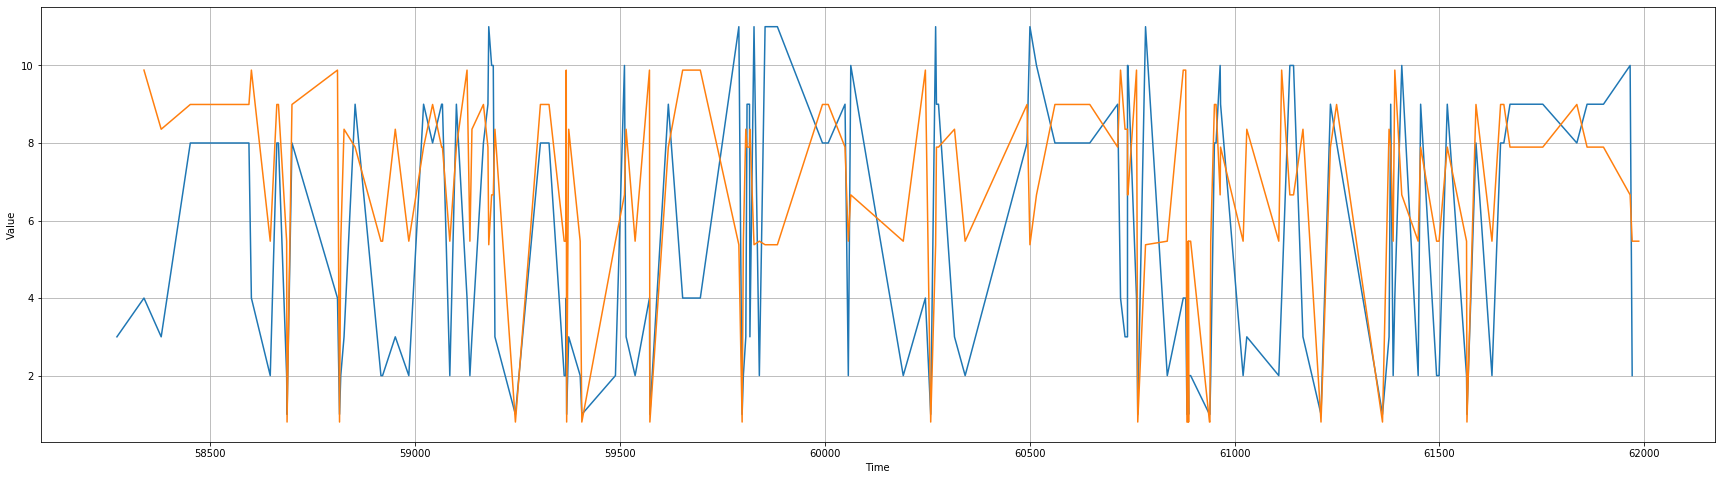

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domusreal-event-ordered - filtered8.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(15)
  prediction = prediction
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

11.695054


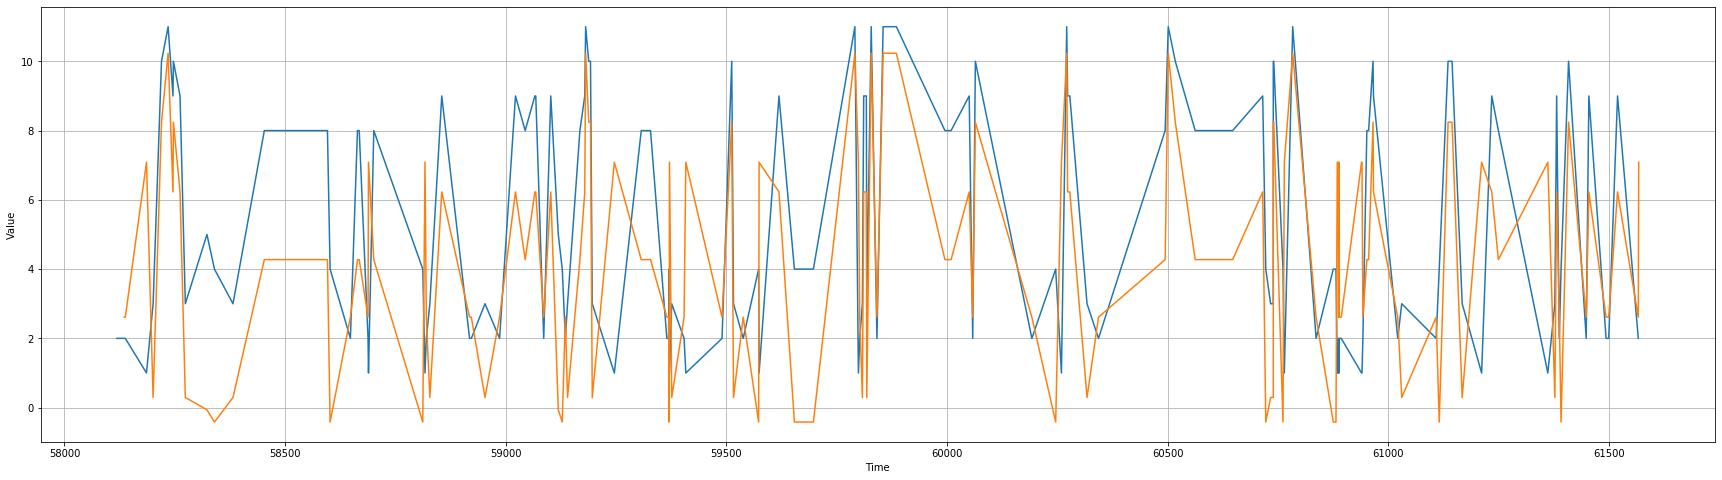

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domusreal-event-ordered - filtered9.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(-17)
  prediction = prediction + 17
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())

11.048038


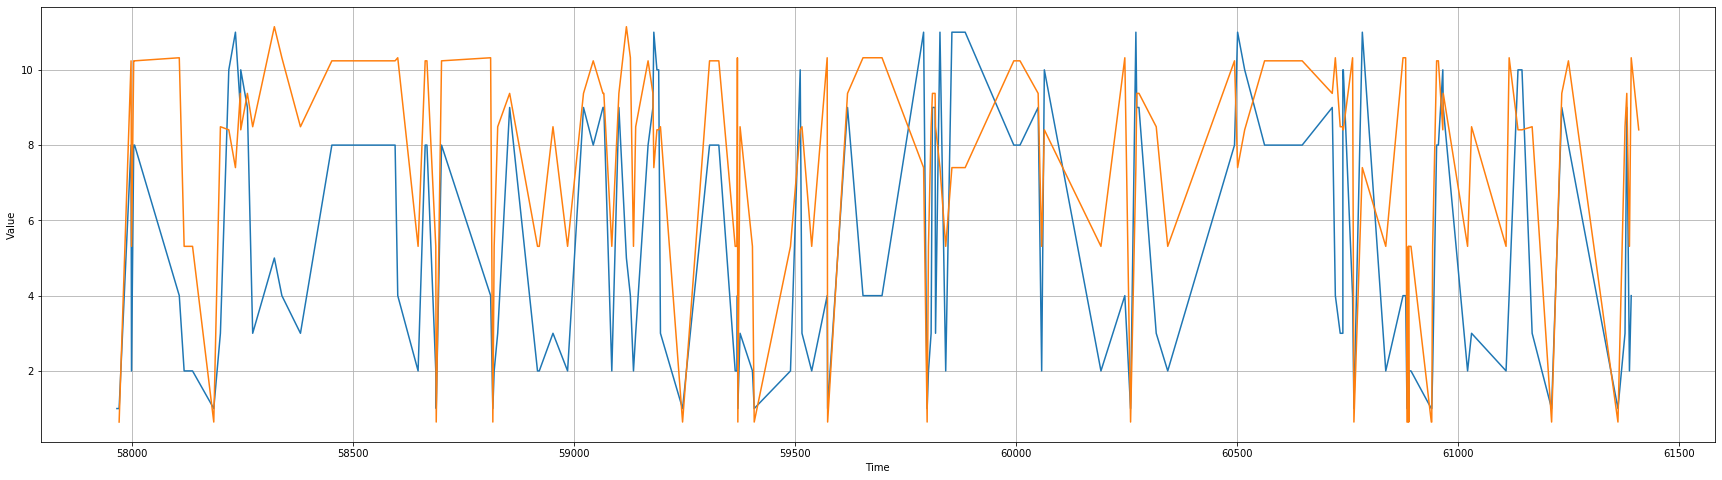

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/data/domusreal-event-ordered - filtered10.csv"
df = pd.read_csv(path)
#print(df.head)
#df
# Dataset is now stored in a Pandas Dataframe
series = pd.Series(df['event'], index=df.index)
time = pd.Series(df['time'], index=df.index)

#plt.figure(figsize=(10, 6))
#plot_series(time, series)
#plt.show()

split_time = 1000
time_train = time[:split_time].values
x_train = series[:split_time].values
time_valid = time[split_time:].values
x_valid = series[split_time:].values

window_size = 200 #20
batch_size = 320 #32
shuffle_buffer_size = 10000 #1000

#plot_series(time_valid, x_valid)
window_size = 20

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=5,verbose=0)

forecast = []
results = []
for timing in range(len(series) - window_size):
  prediction = model.predict(series[timing + window_size][np.newaxis])*(13)
  prediction = prediction - 40 + 6
  forecast.append(prediction)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(30, 8))

plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, results, start=1, end=151)

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())